In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
import scipy as sp
import random
from factor_analyzer import FactorAnalyzer,calculate_bartlett_sphericity,calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


#read car data
data = pd.read_csv('data/car_data.csv')
data_ip = data[['Annual Income', 'Price ($)']]
sampled_data = data.sample(frac=0.01, random_state=42)

In [2]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [4]:
#check for missing values
data.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [5]:
data = data.fillna('0')

## Graph

### Univariable Analysis

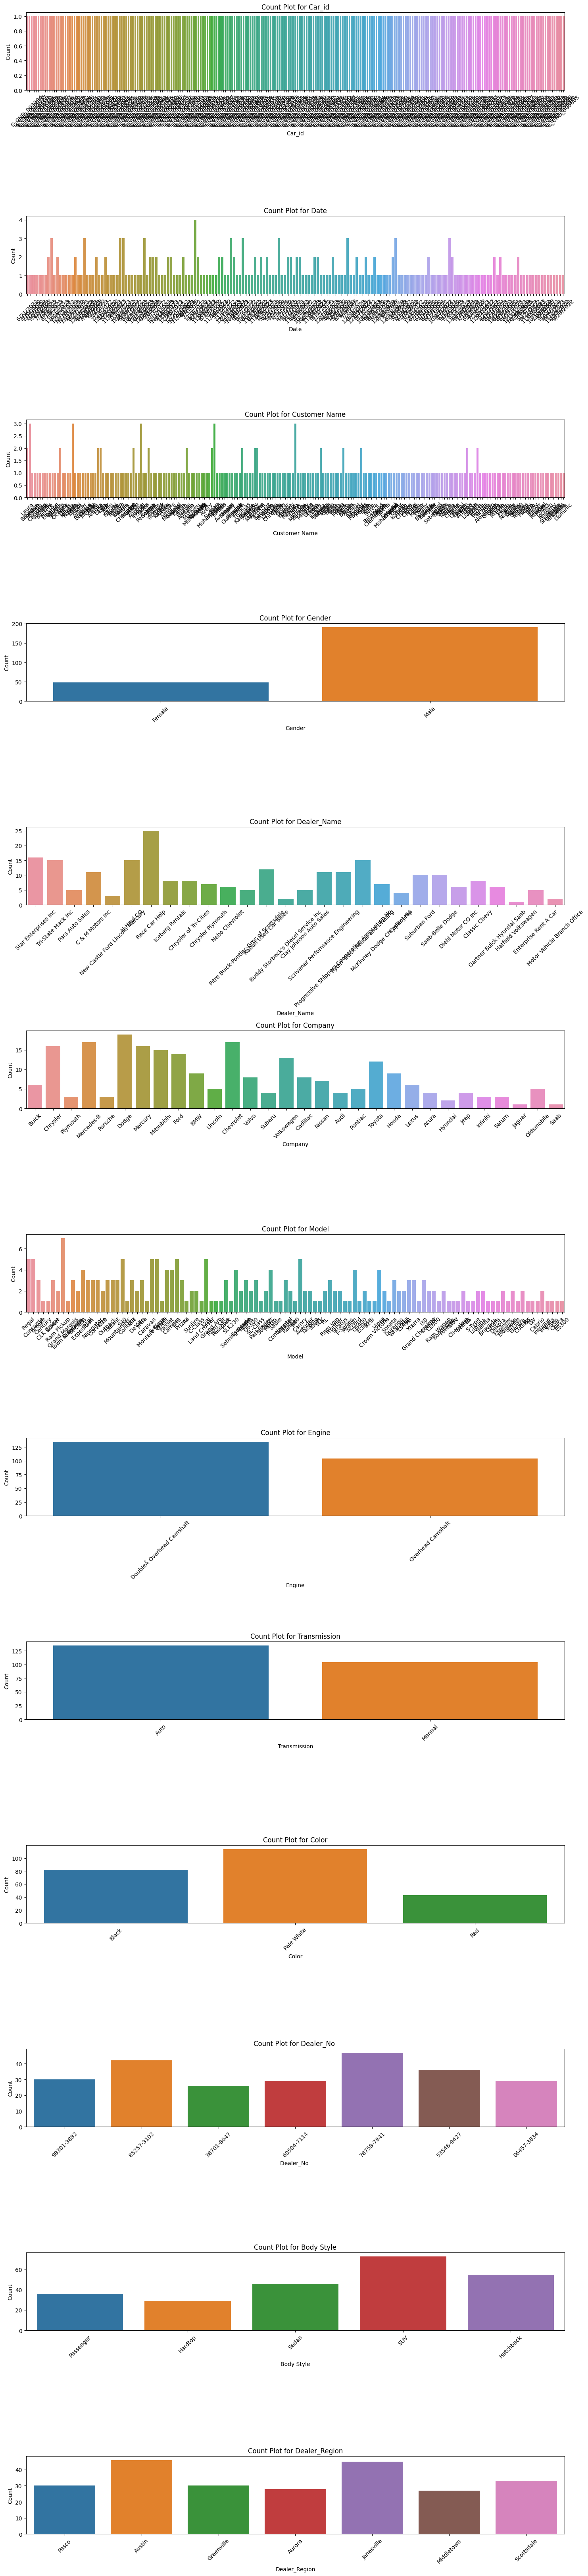

In [6]:
object_columns = sampled_data.select_dtypes(include=['object']).columns

fig, axs = plt.subplots(len(object_columns), 1, figsize=(15, len(object_columns) * 5))

for ax, column in zip(axs, object_columns):
    sns.countplot(x=column, data=sampled_data, ax=ax)
    ax.set_title(f'Count Plot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


C:\Users\27929\AppData\Local\Temp\ipykernel_81700\3008842140.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\27929\AppData\Local\Temp\ipykernel_81700\3008842140.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


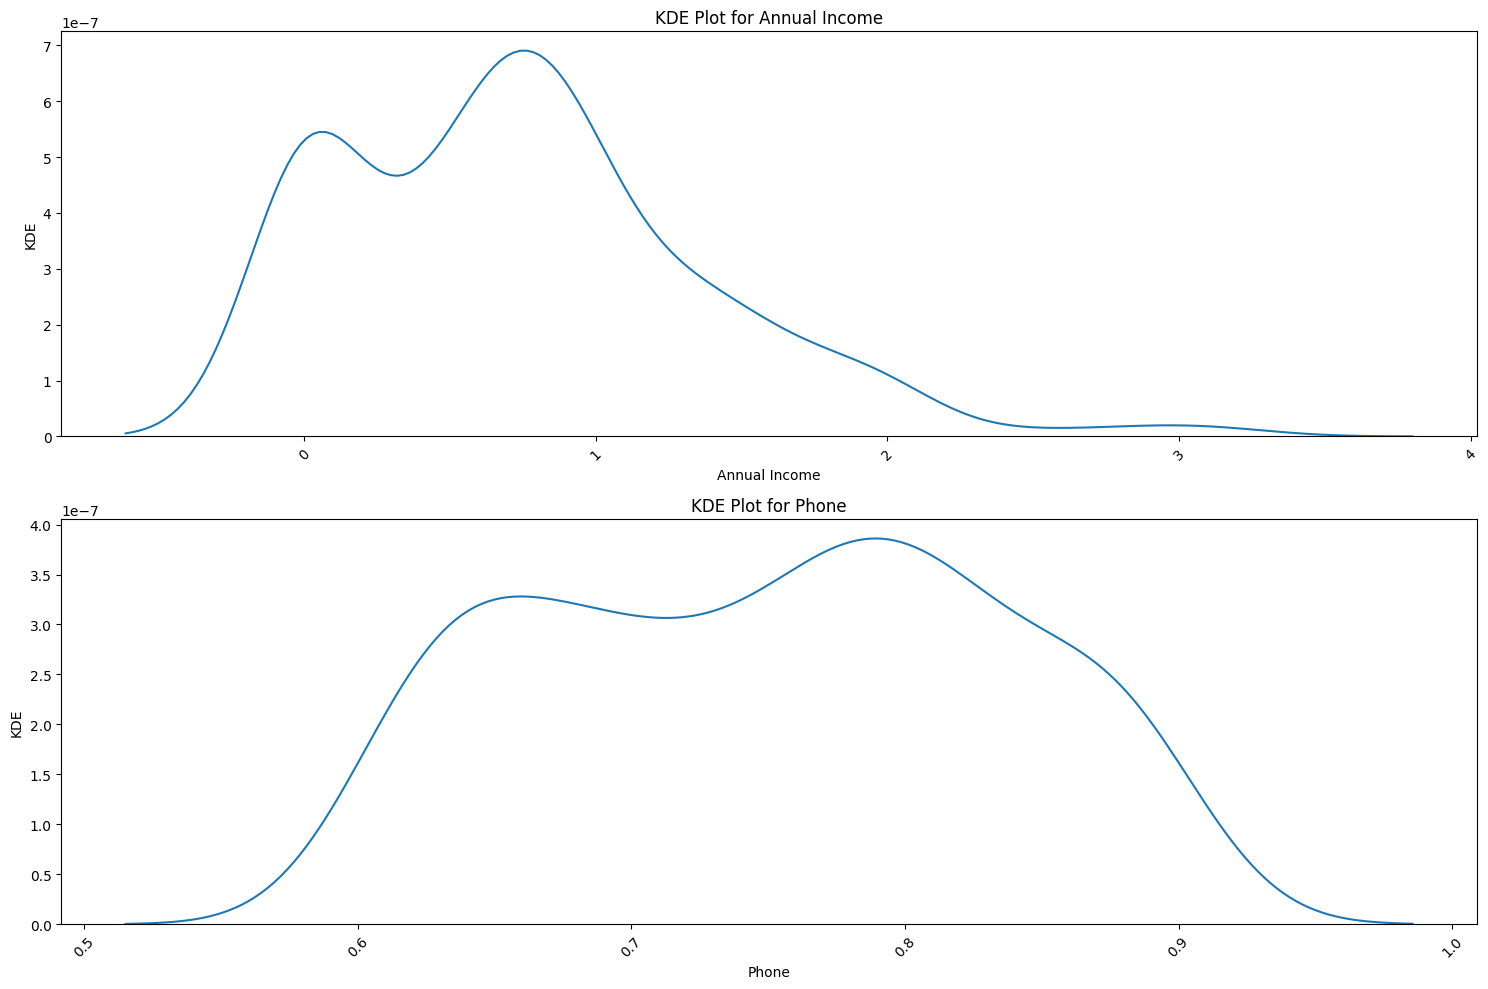

In [7]:
#KDE plot for numerical columns
data_num = sampled_data[['Annual Income', 'Phone']]
num_columns = data_num.select_dtypes(include=['float64', 'int64']).columns

fig, axs = plt.subplots(len(num_columns), 1, figsize=(15, len(num_columns) * 5))

for ax, column in zip(axs, num_columns):
    sns.kdeplot(x=column, data=sampled_data, ax=ax)
    ax.set_title(f'KDE Plot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('KDE')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


### Bivariable Analysis

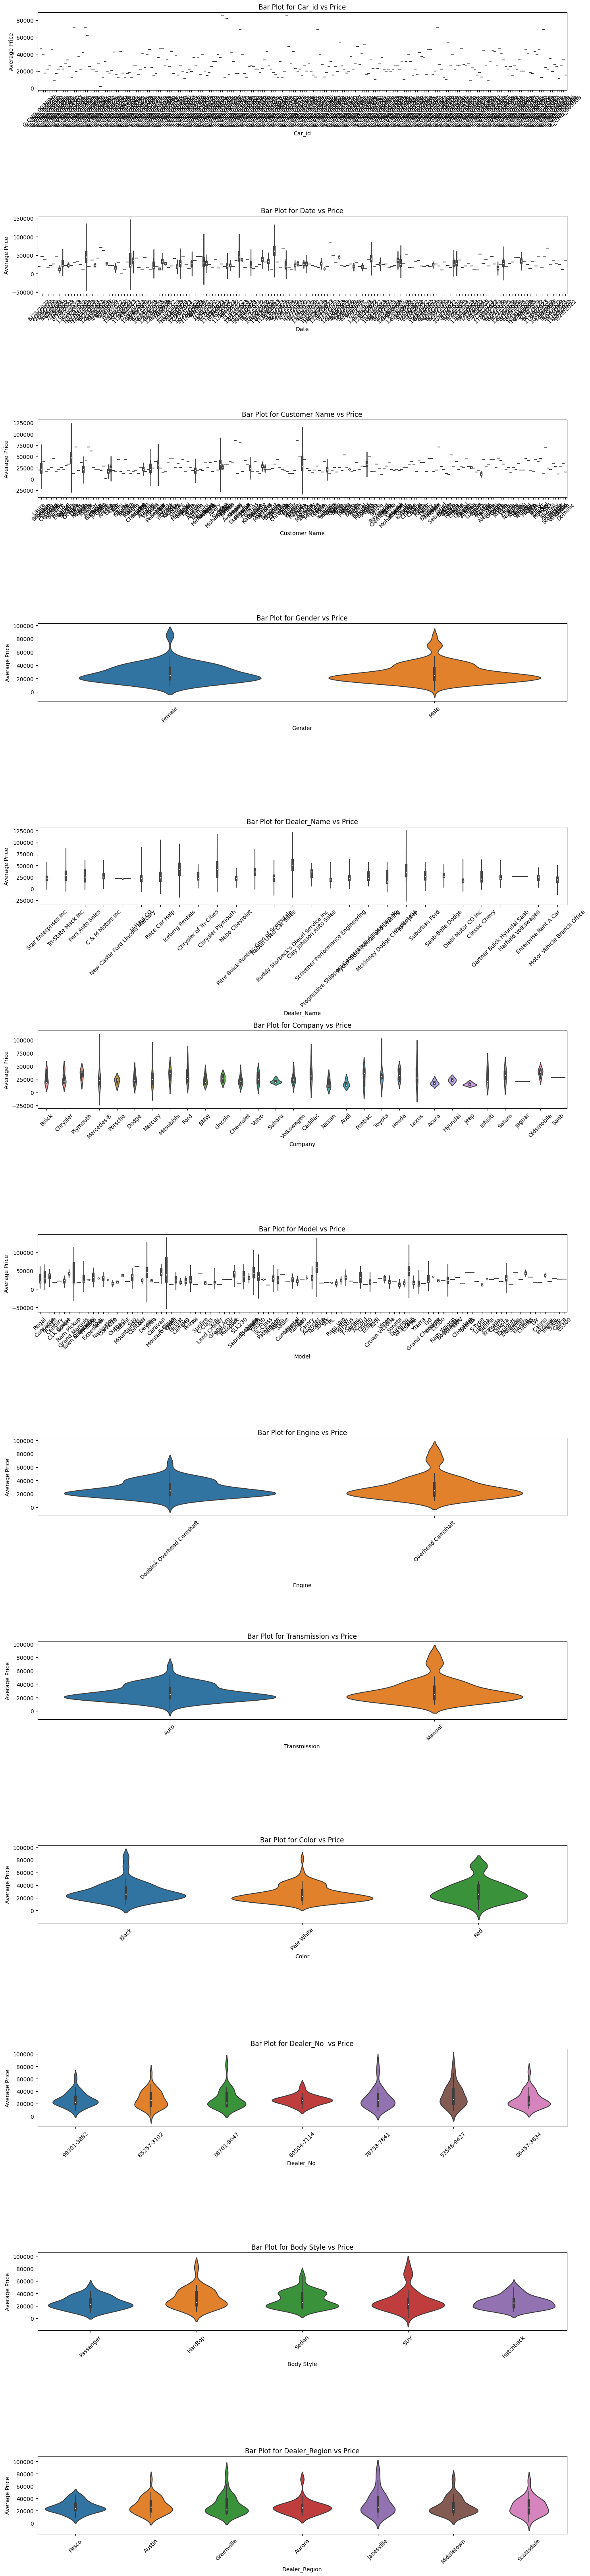

In [8]:
#bivariable analysis
#categorical columns with boxplot

fig, axs = plt.subplots(len(object_columns), 1, figsize=(15, len(object_columns) * 5))

if len(object_columns) > 1:
    axs = axs.flatten()
else:
    axs = [axs]

for ax, column in zip(axs, object_columns):
    sns.violinplot(x=column, y=data['Price ($)'], data=sampled_data, ax=ax, errorbar=None)
    ax.set_title(f'Bar Plot for {column} vs Price')
    ax.set_xlabel(column)
    ax.set_ylabel('Average Price')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


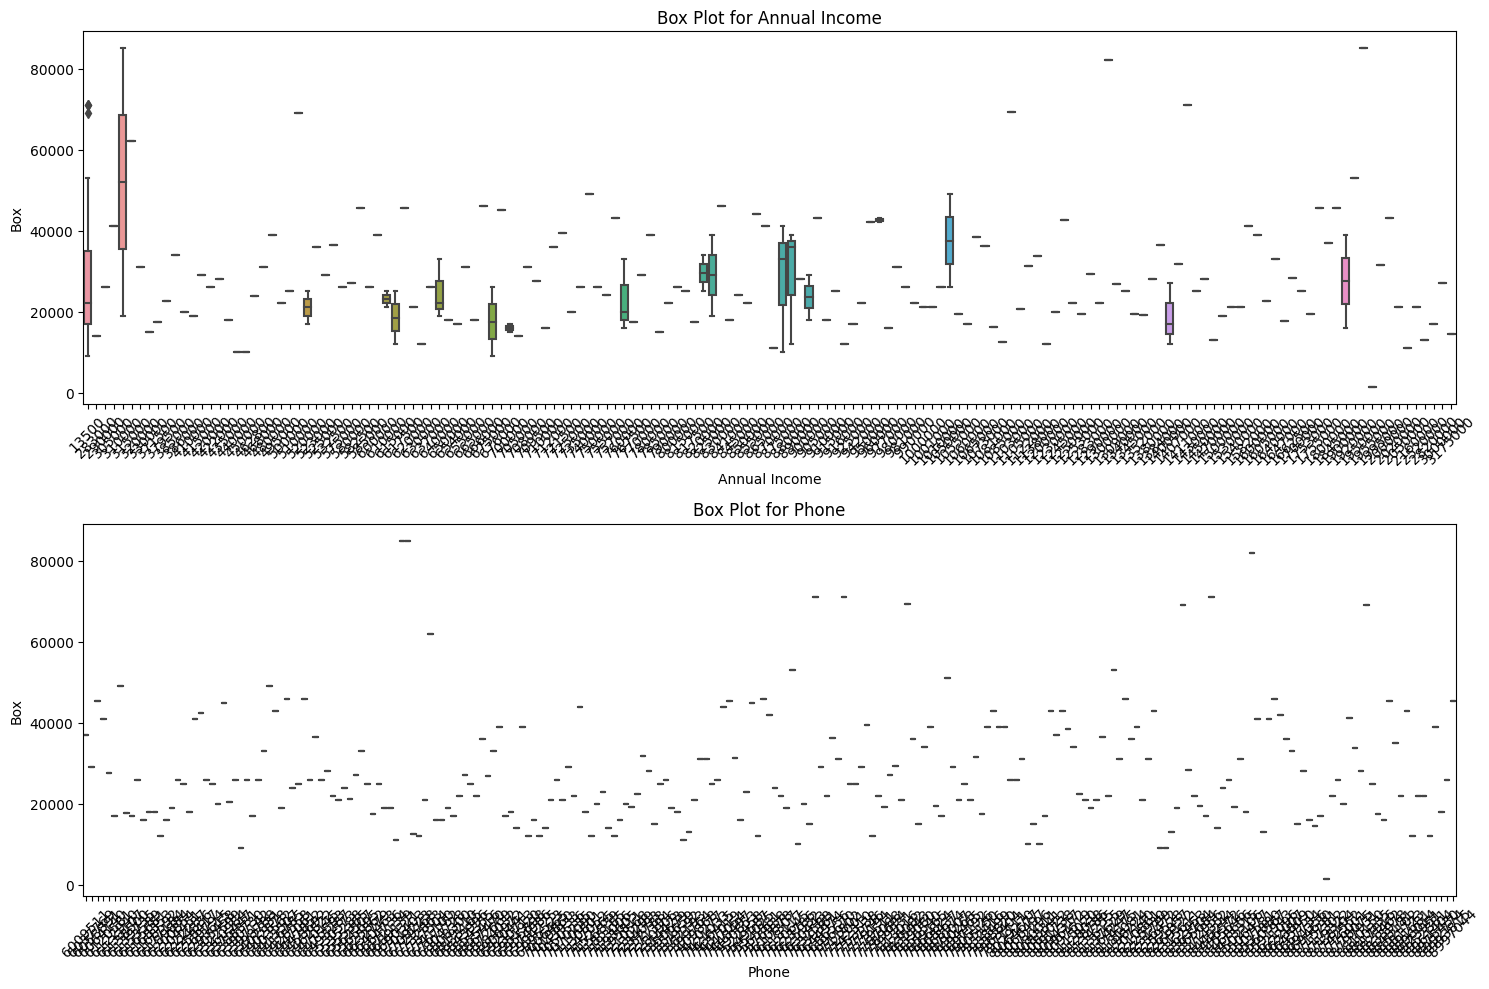

In [9]:
#Bivariate analysis with numerical columns by scatter plot
data_num = sampled_data[['Annual Income', 'Phone']]
num_columns = data_num.select_dtypes(include=['float64', 'int64']).columns

fig, axs = plt.subplots(len(num_columns), 1, figsize=(15, len(num_columns) * 5))

for ax, column in zip(axs, num_columns):
    sns.boxplot(x=column, y=data['Price ($)'], data=sampled_data, ax=ax)
    ax.set_title(f'Box Plot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Box')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()